In [21]:
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import numpy as np
import torch

In [3]:



x=np.linspace(-2*np.pi,2*np.pi,400)
y=np.sin(5*x)/5*x

X=np.expand_dims(x,axis=1)
Y=y.reshape(400,-1)

dataset=TensorDataset(torch.tensor(X,dtype=torch.float).cuda(),torch.tensor(Y,dtype=torch.float).cuda())

dataloader=DataLoader(dataset,batch_size=100,shuffle=True)





In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(in_features=1,out_features=1),
            nn.ReLU(),
            nn.Linear(1,190),
            nn.ReLU(),
            nn.Linear(190,1)
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)

net=Net().cuda()

optim=torch.optim.Adam(Net.parameters(net),lr=0.01)
Loss=nn.MSELoss()

steps_list=[]
loss_list=[]
for epoch in range(2000):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()
        loss.backward()
        optim.step()

    if (epoch+1)%50==0:
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
        steps_list.append(epoch)
        loss_list.append(loss.item())







step: 50 , loss: 0.21972870826721191
step: 100 , loss: 0.22852584719657898
step: 150 , loss: 0.22095206379890442
step: 200 , loss: 0.1852991282939911
step: 250 , loss: 0.19878830015659332
step: 300 , loss: 0.2383583039045334
step: 350 , loss: 0.20577900111675262
step: 400 , loss: 0.1572818160057068
step: 450 , loss: 0.1817619353532791
step: 500 , loss: 0.16928352415561676
step: 550 , loss: 0.18938644230365753
step: 600 , loss: 0.14455746114253998
step: 650 , loss: 0.15559495985507965
step: 700 , loss: 0.15080051124095917
step: 750 , loss: 0.17072536051273346
step: 800 , loss: 0.13846059143543243
step: 850 , loss: 0.24248088896274567
step: 900 , loss: 0.14971117675304413
step: 950 , loss: 0.13840869069099426
step: 1000 , loss: 0.18214164674282074
step: 1050 , loss: 0.1350913941860199
step: 1100 , loss: 0.15128648281097412
step: 1150 , loss: 0.11436296254396439
step: 1200 , loss: 0.138452410697937
step: 1250 , loss: 0.14659281075000763
step: 1300 , loss: 0.16065122187137604
step: 1350 , 

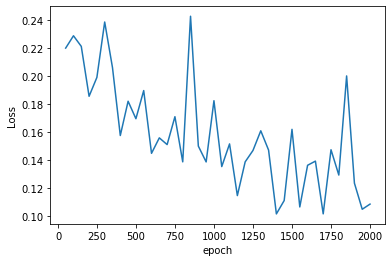

In [8]:

plt.plot(steps_list, loss_list)
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [5]:
predict=net(torch.tensor(X,dtype=torch.float).cuda()).cpu()

In [12]:
class Net2(nn.Module):
    def __init__(self):
        super(Net2, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(in_features=1,out_features=1),
            nn.Linear(1,5),
            nn.Linear(5,10),
            nn.Linear(10,10),
            nn.Linear(10,10),
            nn.Linear(10,10),
            nn.Linear(10,10),
            nn.Linear(10,5),
            nn.Linear(5,1),
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)

net2=Net2().cuda()

optim=torch.optim.Adam(Net.parameters(net),lr=0.001)
Loss=nn.MSELoss()

loss2_list=[]
for epoch in range(2000):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net2(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()
        loss.backward()
        optim.step()

    if (epoch+1)%50==0:
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))
        loss2_list.append(loss.item())

step: 50 , loss: 0.24019187688827515
step: 100 , loss: 0.288166344165802
step: 150 , loss: 0.255934476852417
step: 200 , loss: 0.2832965552806854
step: 250 , loss: 0.23416893184185028
step: 300 , loss: 0.26313453912734985
step: 350 , loss: 0.24359087646007538
step: 400 , loss: 0.3070524334907532
step: 450 , loss: 0.25162017345428467
step: 500 , loss: 0.2414100170135498
step: 550 , loss: 0.2831004559993744
step: 600 , loss: 0.2927931547164917
step: 650 , loss: 0.296286016702652
step: 700 , loss: 0.22917087376117706
step: 750 , loss: 0.32759740948677063
step: 800 , loss: 0.22577741742134094
step: 850 , loss: 0.29126423597335815
step: 900 , loss: 0.2957744002342224
step: 950 , loss: 0.20919236540794373
step: 1000 , loss: 0.28782007098197937
step: 1050 , loss: 0.3103879988193512
step: 1100 , loss: 0.26049259305000305
step: 1150 , loss: 0.26170334219932556
step: 1200 , loss: 0.28022992610931396
step: 1250 , loss: 0.24906031787395477
step: 1300 , loss: 0.26458004117012024
step: 1350 , loss: 

In [19]:
predict2=net2(torch.tensor(X,dtype=torch.float).cuda()).cpu()

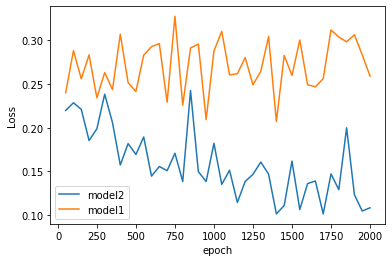

In [14]:
plt.plot(steps_list, loss_list,label="model2")
plt.plot(steps_list, loss2_list,label="model1")
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend()
plt.show()

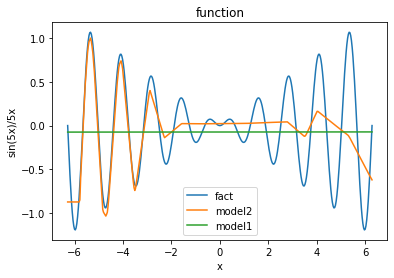

In [20]:
import matplotlib.pyplot as plt
plt.plot(x,y,label="fact")
plt.plot(x,predict.detach().numpy(),label="model2")
plt.plot(x,predict2.detach().numpy(),label="model1")
plt.title("function")
plt.xlabel("x")
plt.ylabel("sin(5x)/5x")
plt.legend()
plt.savefig(fname="result.png",figsize=[10,10])
plt.show()

In [11]:
print(net)

Net(
  (net): Sequential(
    (0): Linear(in_features=1, out_features=1, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1, out_features=190, bias=True)
    (3): ReLU()
    (4): Linear(in_features=190, out_features=1, bias=True)
  )
)


In [16]:
from torchsummary import summary

In [17]:
summary(net,(1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               2
              ReLU-2                 [-1, 1, 1]               0
            Linear-3               [-1, 1, 190]             380
              ReLU-4               [-1, 1, 190]               0
            Linear-5                 [-1, 1, 1]             191
Total params: 573
Trainable params: 573
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.01
----------------------------------------------------------------


In [18]:
summary(net2,(1,1))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 1]               2
            Linear-2                 [-1, 1, 5]              10
            Linear-3                [-1, 1, 10]              60
            Linear-4                [-1, 1, 10]             110
            Linear-5                [-1, 1, 10]             110
            Linear-6                [-1, 1, 10]             110
            Linear-7                [-1, 1, 10]             110
            Linear-8                 [-1, 1, 5]              55
            Linear-9                 [-1, 1, 1]               6
Total params: 573
Trainable params: 573
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
---------------------------------------------------